In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
data =  pd.read_csv("./weatherAUS.csv")
data.head()

data["RainTomorrow"].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [75]:
X = data.drop("RainTomorrow", axis=1)
Y = data["RainTomorrow"]

X.shape, Y.shape


((145460, 22), (145460,))

In [76]:
# len(X)

In [77]:
# X.isna().sum()

In [78]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [79]:
# data.dtypes

In [80]:
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

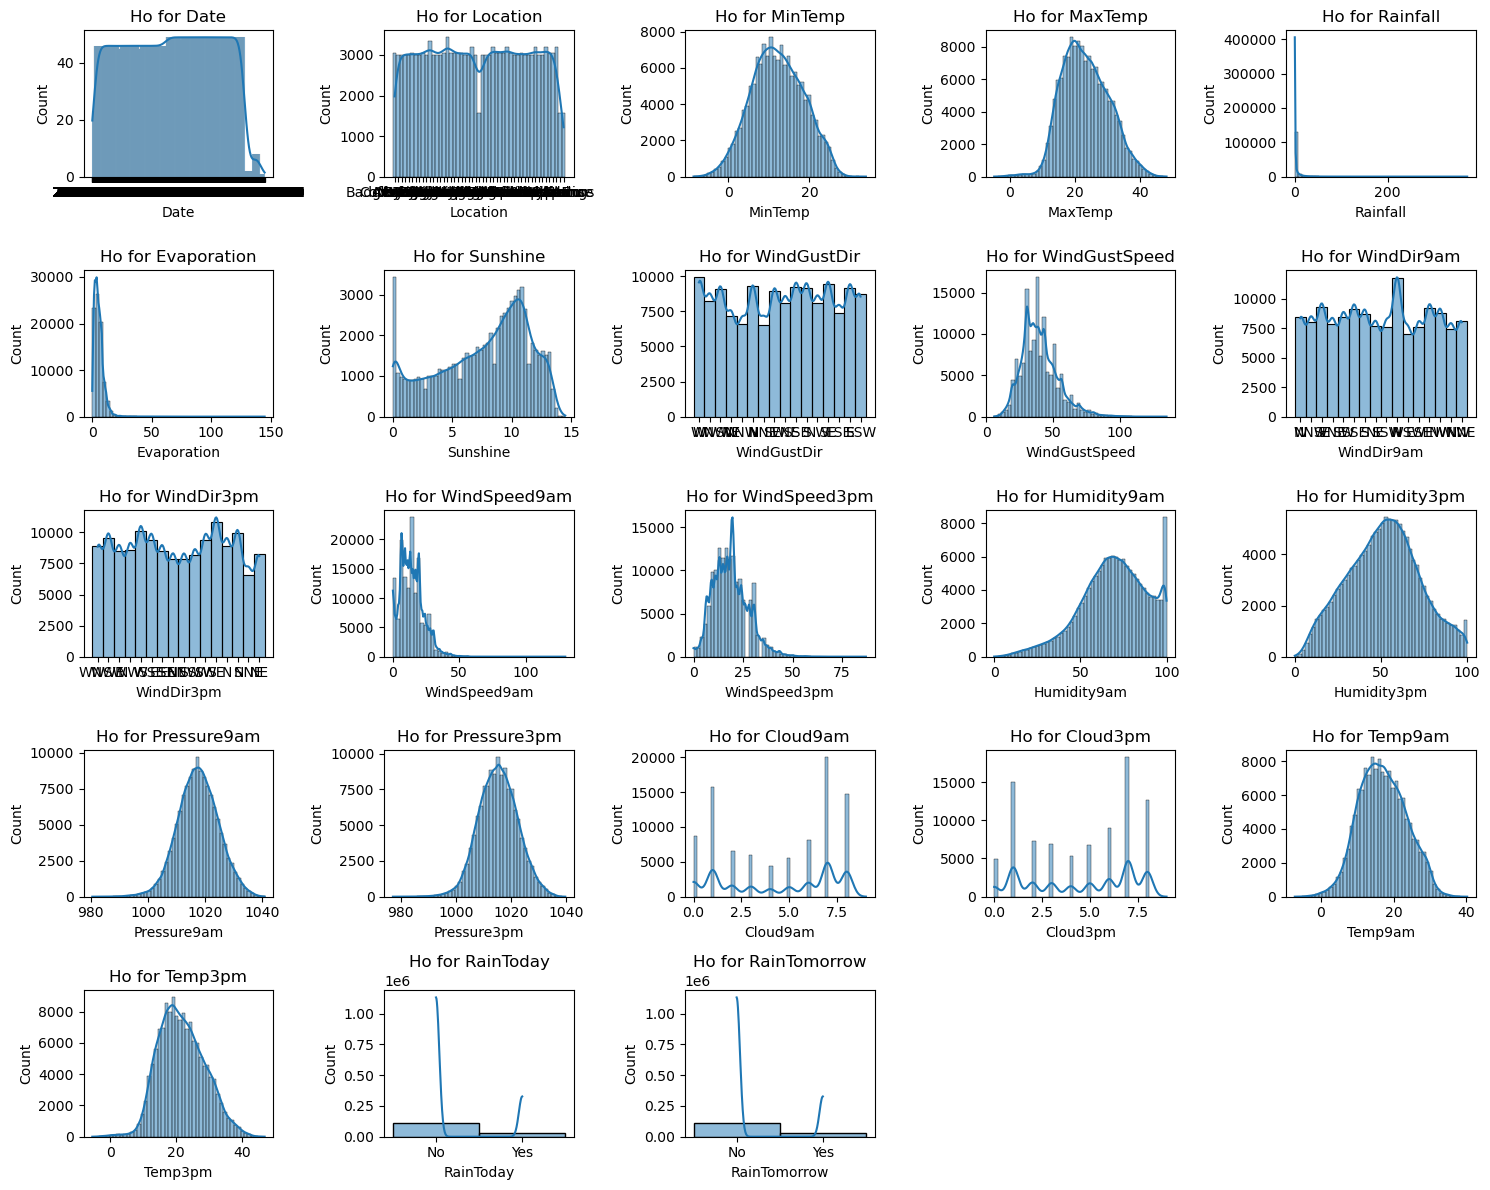

In [81]:
plt.figure(figsize=(15, 12))
num = 1
for  col in ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
                'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
                'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
                'Temp3pm', 'RainToday', 'RainTomorrow']:
    plt.subplot(5, 5, num) 
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(f"Ho for {col}")
    num+=1

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [82]:
# data.head()

In [91]:


# // Skewed Ho for Rainfall, Evaporation, WindsurSpeed, WindSpeed9am, windSpeed3pm, Humiidyt9pam
skewed_columns = ['Rainfall', 'Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm','Humidity9am']

for col in skewed_columns:
    data[col] = data[col].fillna(data[col].median())

# //Normal Ho for MinTemo, Ho for MaxTemp, Ho for sumshine, 
normal_columns = ['MinTemp', 'MaxTemp','Sunshine', 'Humidity3pm','Pressure9am','Pressure3pm', 'Temp9am','Temp3pm','Cloud9am','Cloud3pm']
# WindGustDir, WindDir9am, WindDir3pm        

for col in normal_columns:
   data[col] = data[col].fillna(data[col].mean())


text_columns = ['WindGustDir','WindDir9am', 'WindDir3pm']
for col in text_columns:
   data[col] = data[col].fillna('missing')


yes_no = ['RainToday']
for col in yes_no:
   data[col] = data[col].fillna(data[col].mode()[0])


In [92]:
data.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow     3267
dtype: int64

In [96]:
data = data.dropna(subset=["RainTomorrow"])
data.shape

(142193, 23)

In [85]:
# plt.figure(figsize=(15, 12))
# num = 1
# for  col in ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
#                 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
#                 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
#                 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
#                 'Temp3pm', 'RainToday', 'RainTomorrow']:
#     plt.subplot(5, 5, num) 
#     sns.histplot(data[col], bins=50, kde=True)
#     plt.title(f"Ho for {col}")
#     num+=1

# plt.tight_layout()  # Adjust layout for better spacing
# plt.show()
